In [9]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import itertools

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
#Constants
IMG_SIZE = 48
DATA_DIR = '/content/drive/MyDrive/Project_dataset/facial-emotion-recognition/images/'
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']

# Load the dataset
csv_path = '/content/drive/MyDrive/Project_dataset/facial-emotion-recognition//emotions.csv'
df = pd.read_csv(csv_path)
df.head(10)

,set_id,gender,age,country
0,0,FEMALE,36,RU
1,1,FEMALE,37,RU
2,2,FEMALE,36,RU
3,3,MALE,29,RU
4,4,FEMALE,43,RU
5,5,MALE,49,RU
6,6,FEMALE,38,RU
7,7,MALE,19,PH
8,8,FEMALE,29,RU
9,9,FEMALE,32,RU


In [12]:
df['set_id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

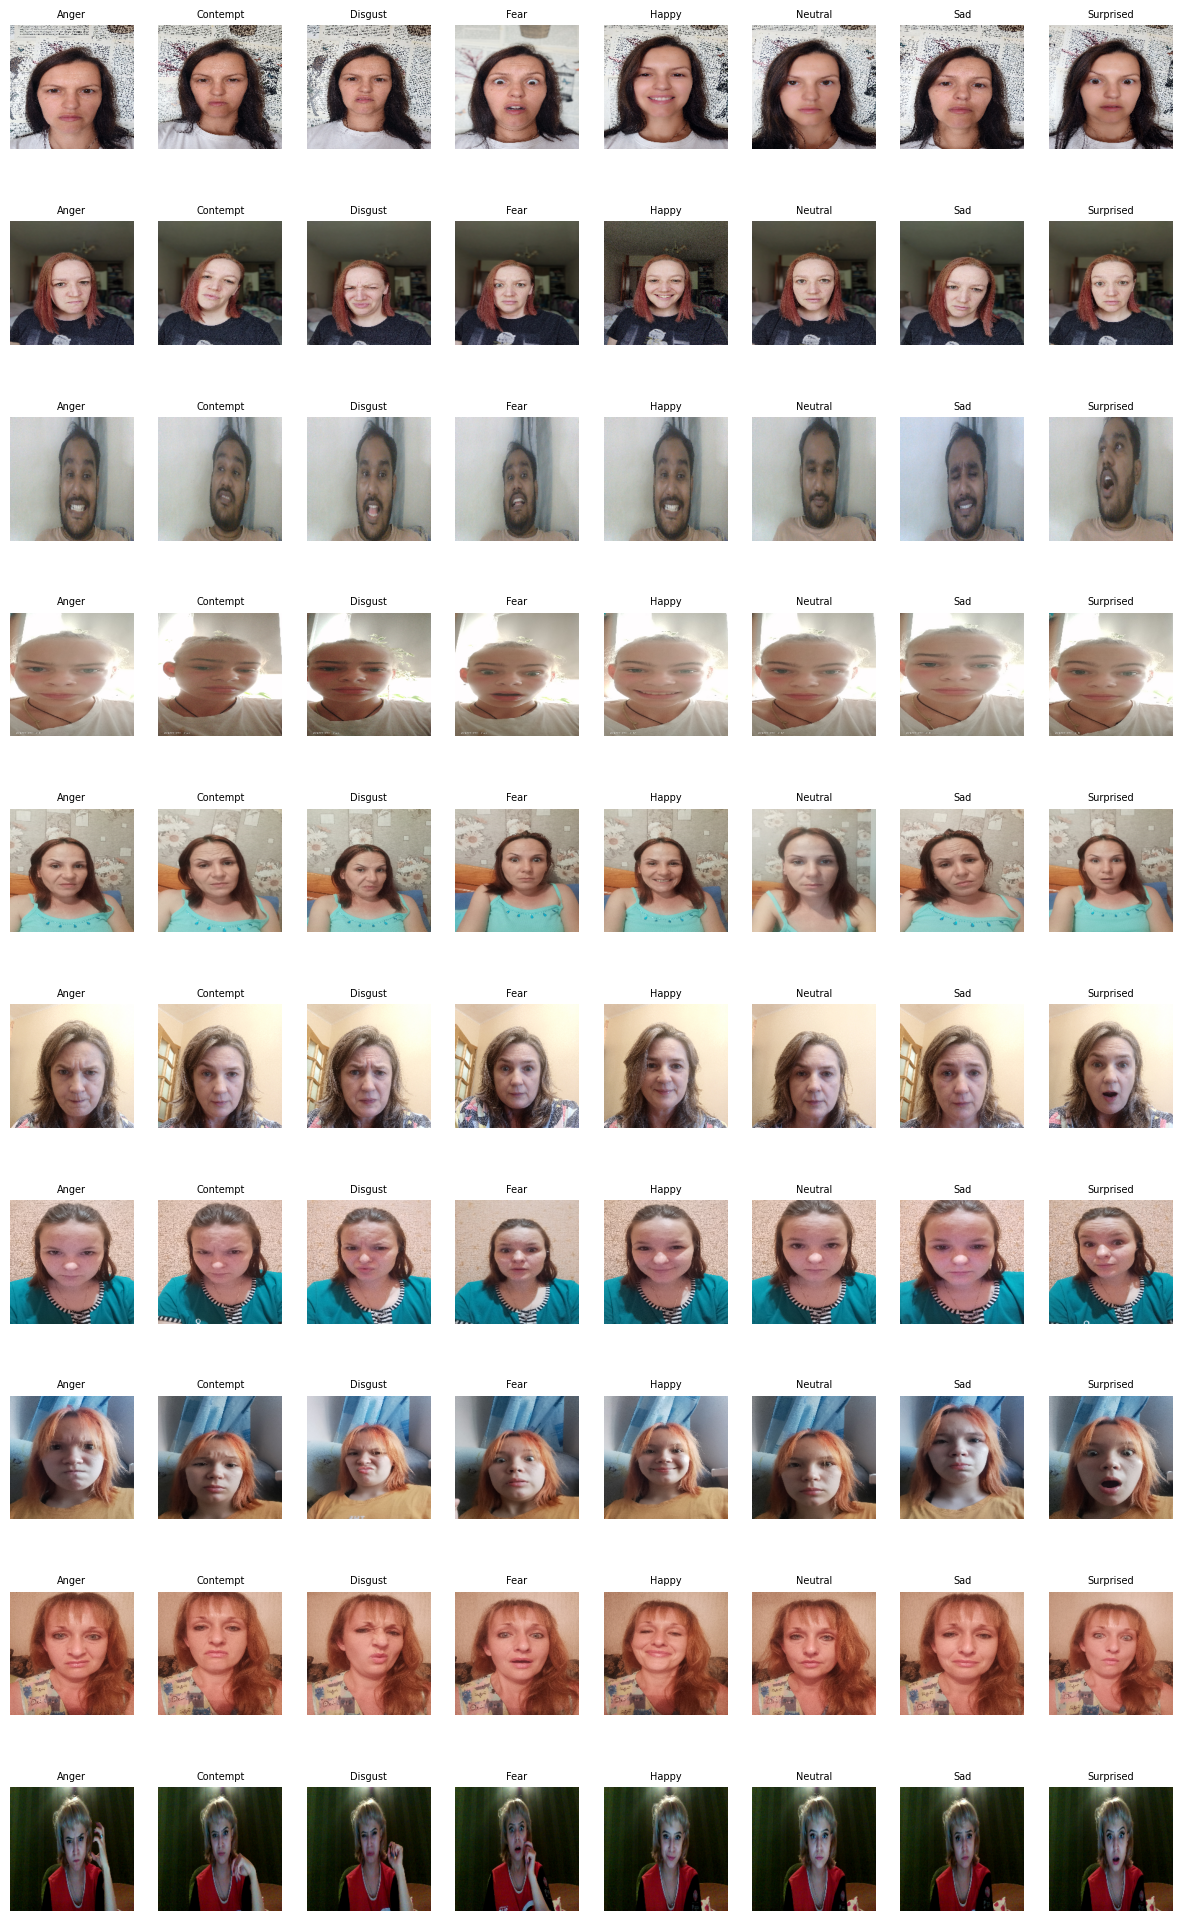

In [13]:
DIR = '/content/drive/MyDrive/Project_dataset/facial-emotion-recognition'
path_imgs = os.path.join(DIR, 'images')
# Get all folder names
all_folders = sorted([f for f in os.listdir(path_imgs) if os.path.isdir(os.path.join(path_imgs, f))])
folders_to_process = all_folders[:10]
plt.figure(figsize=(15, 25))
IM_SIZE = (200, 200)
ind = 0

for folder_name in folders_to_process:
    set_id = int(folder_name)

    for class_name in EMOTIONS:
        ind += 1
        path_img = os.path.join(path_imgs, str(set_id), class_name.capitalize() + '.jpg')

        if not os.path.isfile(path_img):
            print(f"Warning: File {path_img} does not exist.")
            continue

        img = cv2.imread(path_img)

        if img is None:
            print(f"Warning: Could not load image at {path_img}. Skipping.")
            continue

        img = cv2.resize(img, IM_SIZE)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(len(folders_to_process), len(EMOTIONS), ind)
        plt.title(class_name, fontsize=7)
        plt.imshow(img)
        plt.axis('off')

plt.show()

<ipython-input-14-0388b4f762c1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis", edgecolor="white")


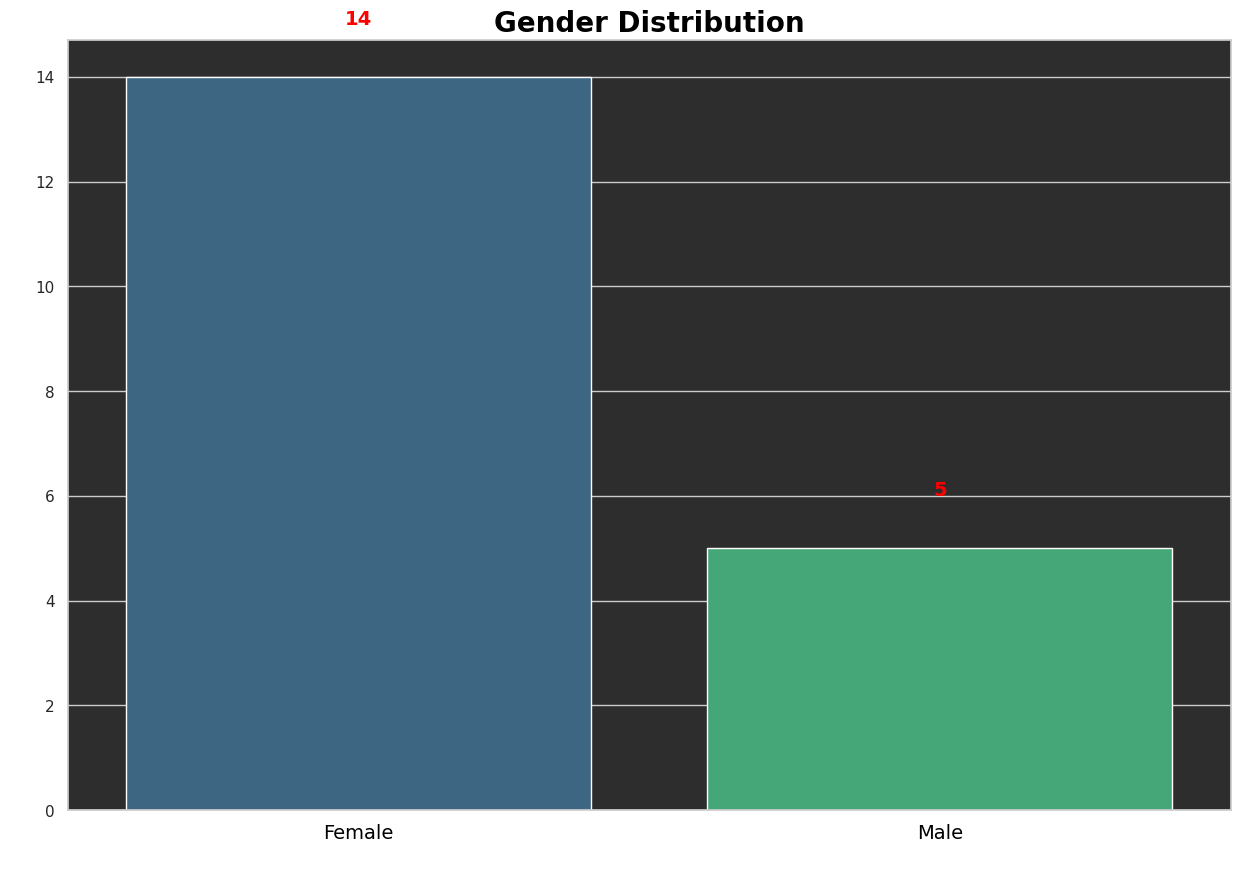

In [14]:
# Set style to darkgrid
sns.set(style="whitegrid")

# Gender distribution
plt.figure(figsize=(15, 10))
gender_counts = df['gender'].value_counts()

# Create the bar plot with a different color palette
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis", edgecolor="white")

# Add title and labels with adjusted font sizes
plt.title('Gender Distribution', fontsize=20, weight='bold', color='black')
plt.xlabel('Gender', fontsize=16, color='white')
plt.ylabel('Count', fontsize=16, color='white')

# Customize x-ticks
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], fontsize=14, color='black')

# Add data labels to each bar
for index, value in enumerate(gender_counts.values):
    plt.text(index, value + 1, str(value), ha='center', fontsize=14, weight='bold', color='red')

# Adjust background color to match the darkgrid style
plt.gca().patch.set_facecolor('#2d2d2d')

# Display the plot
plt.show()


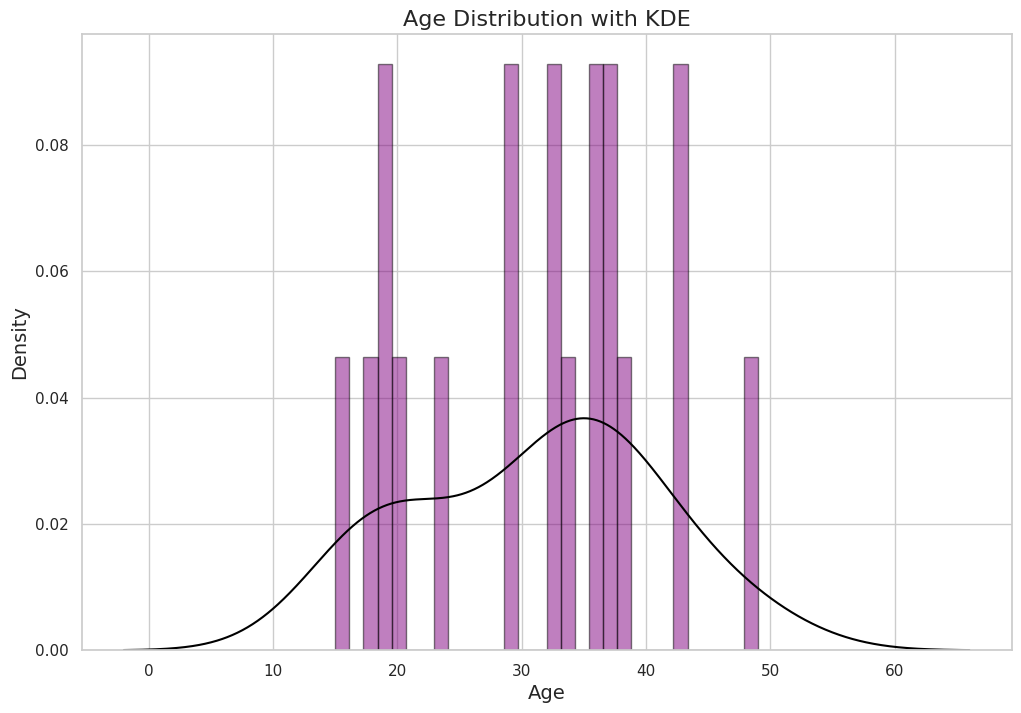

In [15]:
plt.figure(figsize=(12, 8))
df['age'].plot(kind='hist', bins=30, density=True, alpha=0.5, color='purple', edgecolor='black')
df['age'].plot(kind='kde', color='black')
plt.title('Age Distribution with KDE', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

<ipython-input-16-cf74133d0b3b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y='age', data=df, palette="coolwarm", inner="quartile")


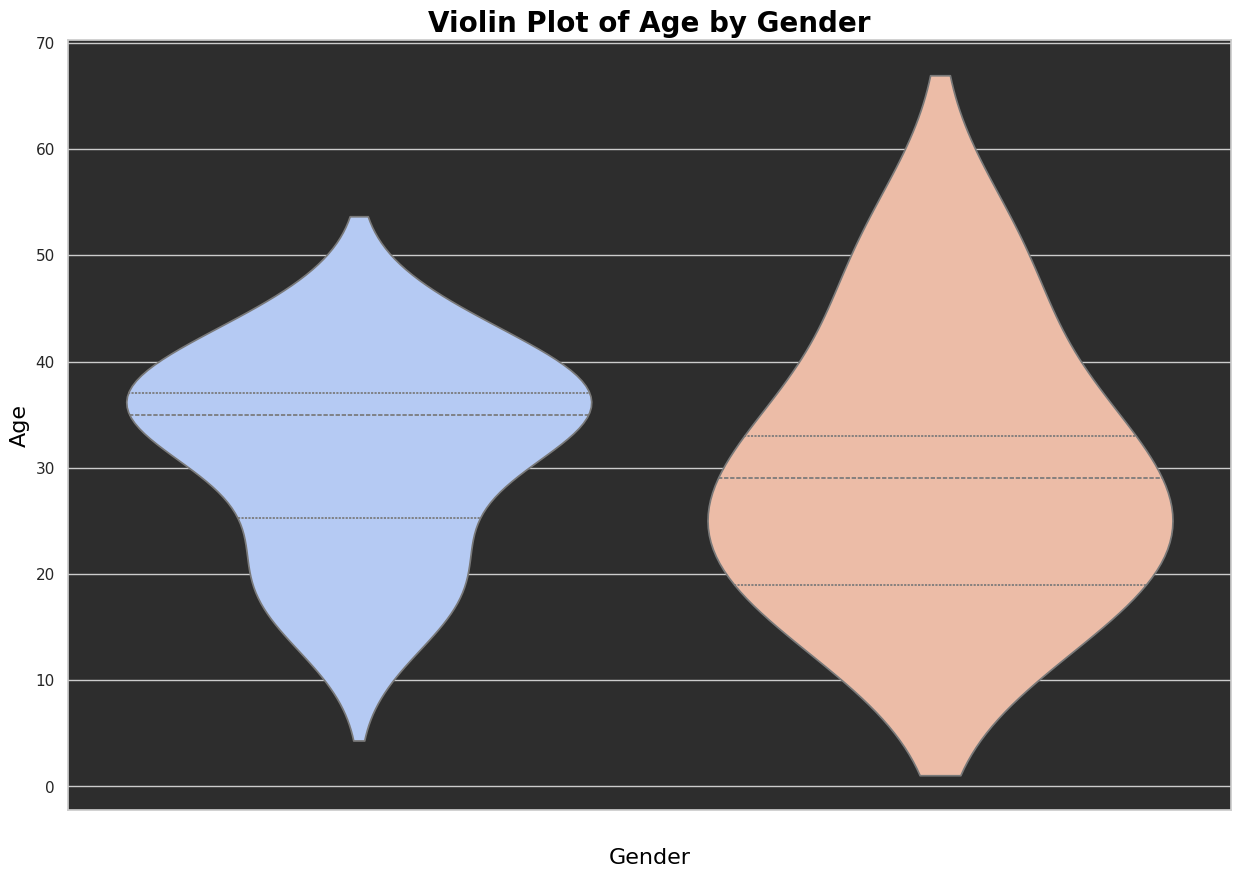

In [16]:
plt.figure(figsize=(15, 10))
sns.violinplot(x='gender', y='age', data=df, palette="coolwarm", inner="quartile")
plt.title('Violin Plot of Age by Gender', fontsize=20, weight='bold', color='black')
plt.xlabel('Gender', fontsize=16, color='black')
plt.ylabel('Age', fontsize=16, color='black')
plt.xticks([0, 1], ['Female', 'Male'], fontsize=14, color='white')
plt.gca().patch.set_facecolor('#2d2d2d')
plt.show()

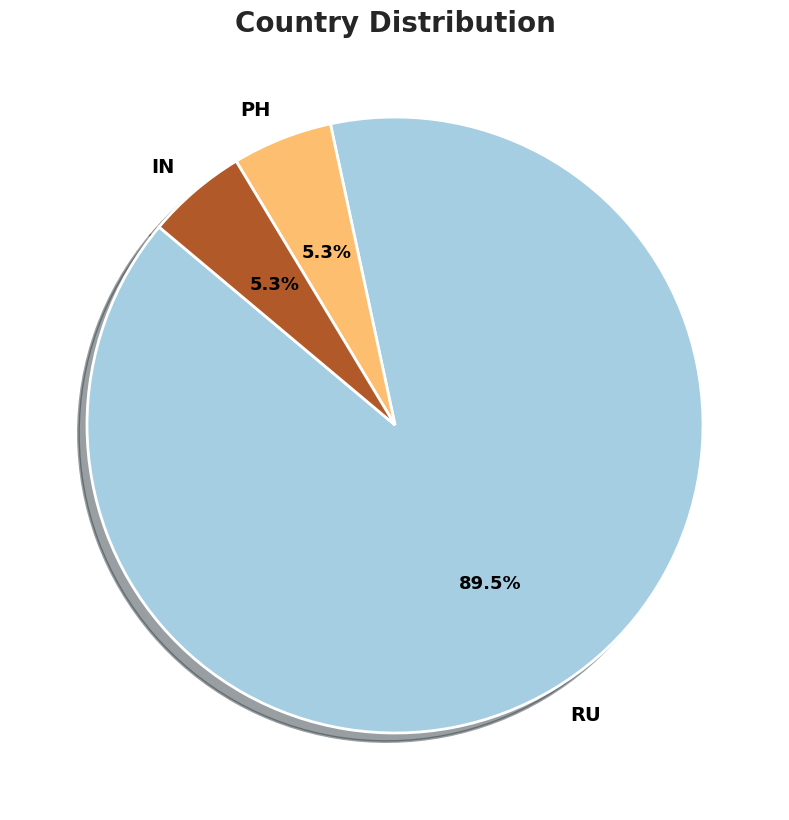

In [17]:
# Set the style
sns.set(style="whitegrid")

country_counts = df['country'].value_counts()

plt.figure(figsize=(15, 10))

colors = plt.cm.Paired(np.linspace(0, 1, len(country_counts)))

# Plot the pie chart
wedges, texts, autotexts = plt.pie(
    country_counts,
    labels=country_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    wedgeprops=dict(edgecolor='white', linewidth=2),
    shadow=True,
    textprops=dict(color="black", fontsize=12)
)

# Style the text labels and percentage texts
for text in texts:
    text.set_fontsize(14)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_fontsize(13)
    autotext.set_fontweight('bold')
    autotext.set_color('black')

plt.title('Country Distribution', fontsize=20, weight='bold')

plt.show()

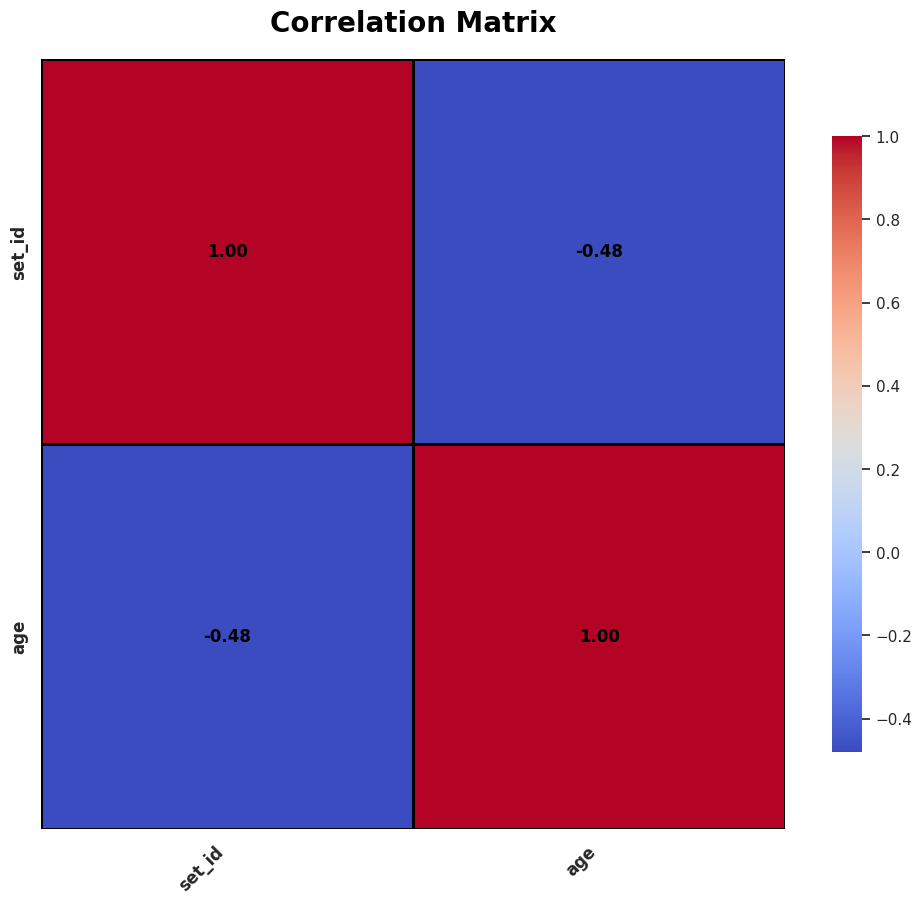

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 10))

numeric_cols = df.select_dtypes(include=[np.number])

corr = numeric_cols.corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=1,
    linecolor='black',
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 12, "weight": "bold", "color": "black"}
)

plt.title('Correlation Matrix', fontsize=20, weight='bold', color='black', pad=20)

plt.xticks(fontsize=12, rotation=45, ha="right", weight='bold')
plt.yticks(fontsize=12, weight='bold')

plt.show()

In [19]:
# Encode the gender column
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

In [20]:
# Function to load and preprocess images
def load_data():
    images = []
    labels = []

    for emotion_label, emotion in enumerate(EMOTIONS):
        # Get the directory for the current emotion
        emotion_dir = os.path.join(DATA_DIR, str(emotion_label))
        if os.path.isdir(emotion_dir):
            for img_file in os.listdir(emotion_dir):
                img_path = os.path.join(emotion_dir, img_file)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                images.append(img_resized)
                labels.append(emotion_label)  # Assigning label based on index
        else:
            print(f"Directory not found for emotion {emotion}: {emotion_dir}")

    return np.array(images), np.array(labels)

images, labels = load_data()

In [21]:
images = images / 255.0
labels_categorical = to_categorical(labels, num_classes=len(EMOTIONS))

In [22]:
print("Distribution of emotions:")
print(pd.Series(labels).value_counts())

Distribution of emotions:
0    8
1    8
2    8
3    8
4    8
5    8
6    8
7    8
Name: count, dtype: int64


In [23]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

In [24]:
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [26]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(EMOTIONS), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

model.save('emotion_recognition_model.h5')
print("Model saved as 'emotion_recognition_model.h5'")

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step - accuracy: 0.0627 - loss: 2.0912 - val_accuracy: 0.0769 - val_loss: 2.0679
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.2271 - loss: 2.0487 - val_accuracy: 0.0769 - val_loss: 2.0736
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.1724 - loss: 2.0436 - val_accuracy: 0.1538 - val_loss: 2.0365
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.1462 - loss: 1.9914 - val_accuracy: 0.1538 - val_loss: 2.0217
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.2768 - loss: 1.9436 - val_accuracy: 0.3846 - val_loss: 1.9687
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.1462 - loss: 1.9150 - val_accuracy: 0.4615 - val_loss: 1.8621
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.3969 - loss: 1.7856 - val_accuracy: 0.5385 - val_loss: 1.7417
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4935 - loss: 1.6859 - val_accuracy: 0.5385 - val_lo

Model saved as 'emotion_recognition_model.h5'


In [27]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


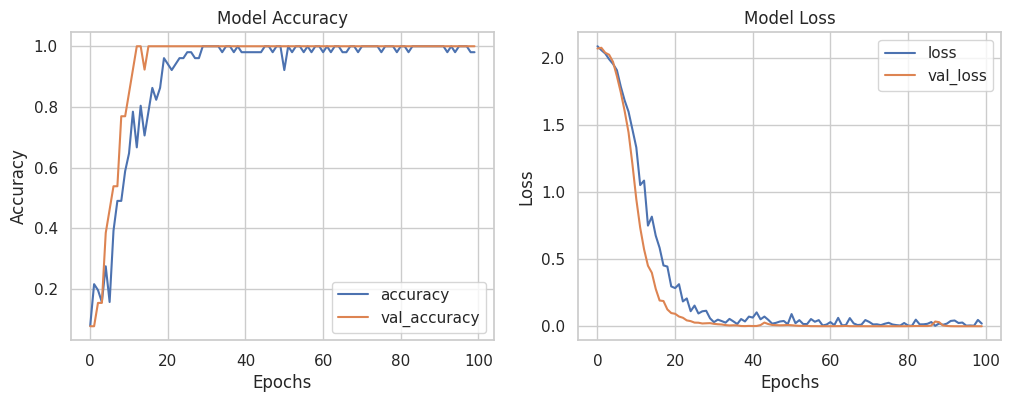

In [28]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


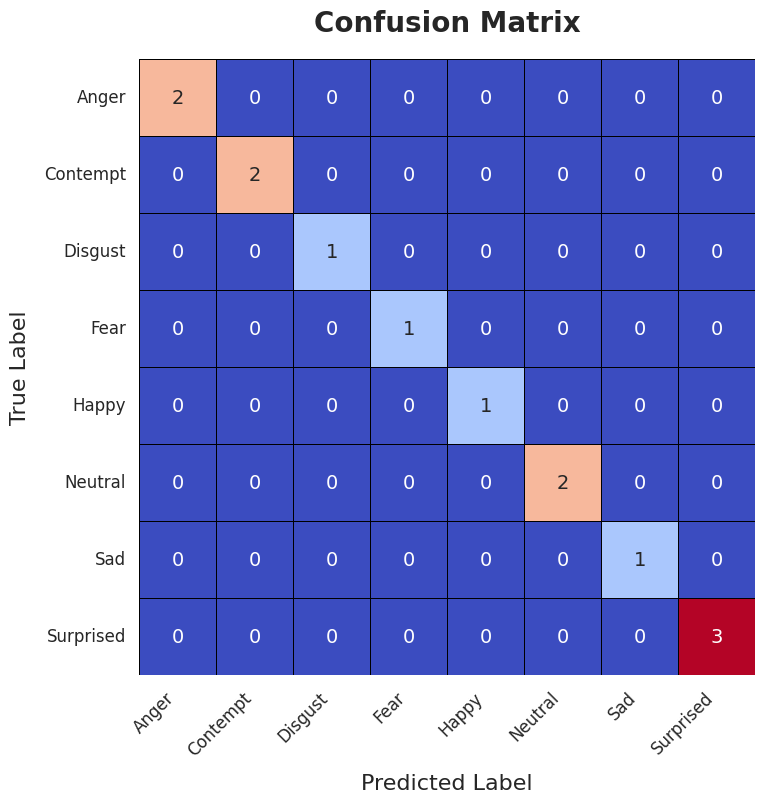

              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00         2
    Contempt       1.00      1.00      1.00         2
     Disgust       1.00      1.00      1.00         1
        Fear       1.00      1.00      1.00         1
       Happy       1.00      1.00      1.00         1
     Neutral       1.00      1.00      1.00         2
         Sad       1.00      1.00      1.00         1
   Surprised       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [29]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
cm_df = pd.DataFrame(cm, index=EMOTIONS, columns=EMOTIONS)

plt.figure(figsize=(12, 8))
sns.set(font_scale=1.2)
sns.heatmap(cm_df, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5, linecolor='black', cbar=False,
            annot_kws={"size": 14}, square=True)

plt.title('Confusion Matrix', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=16, labelpad=10)
plt.ylabel('True Label', fontsize=16, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.show()

# Classification Report
report = classification_report(y_true, y_pred_classes, target_names=EMOTIONS)
print(report)

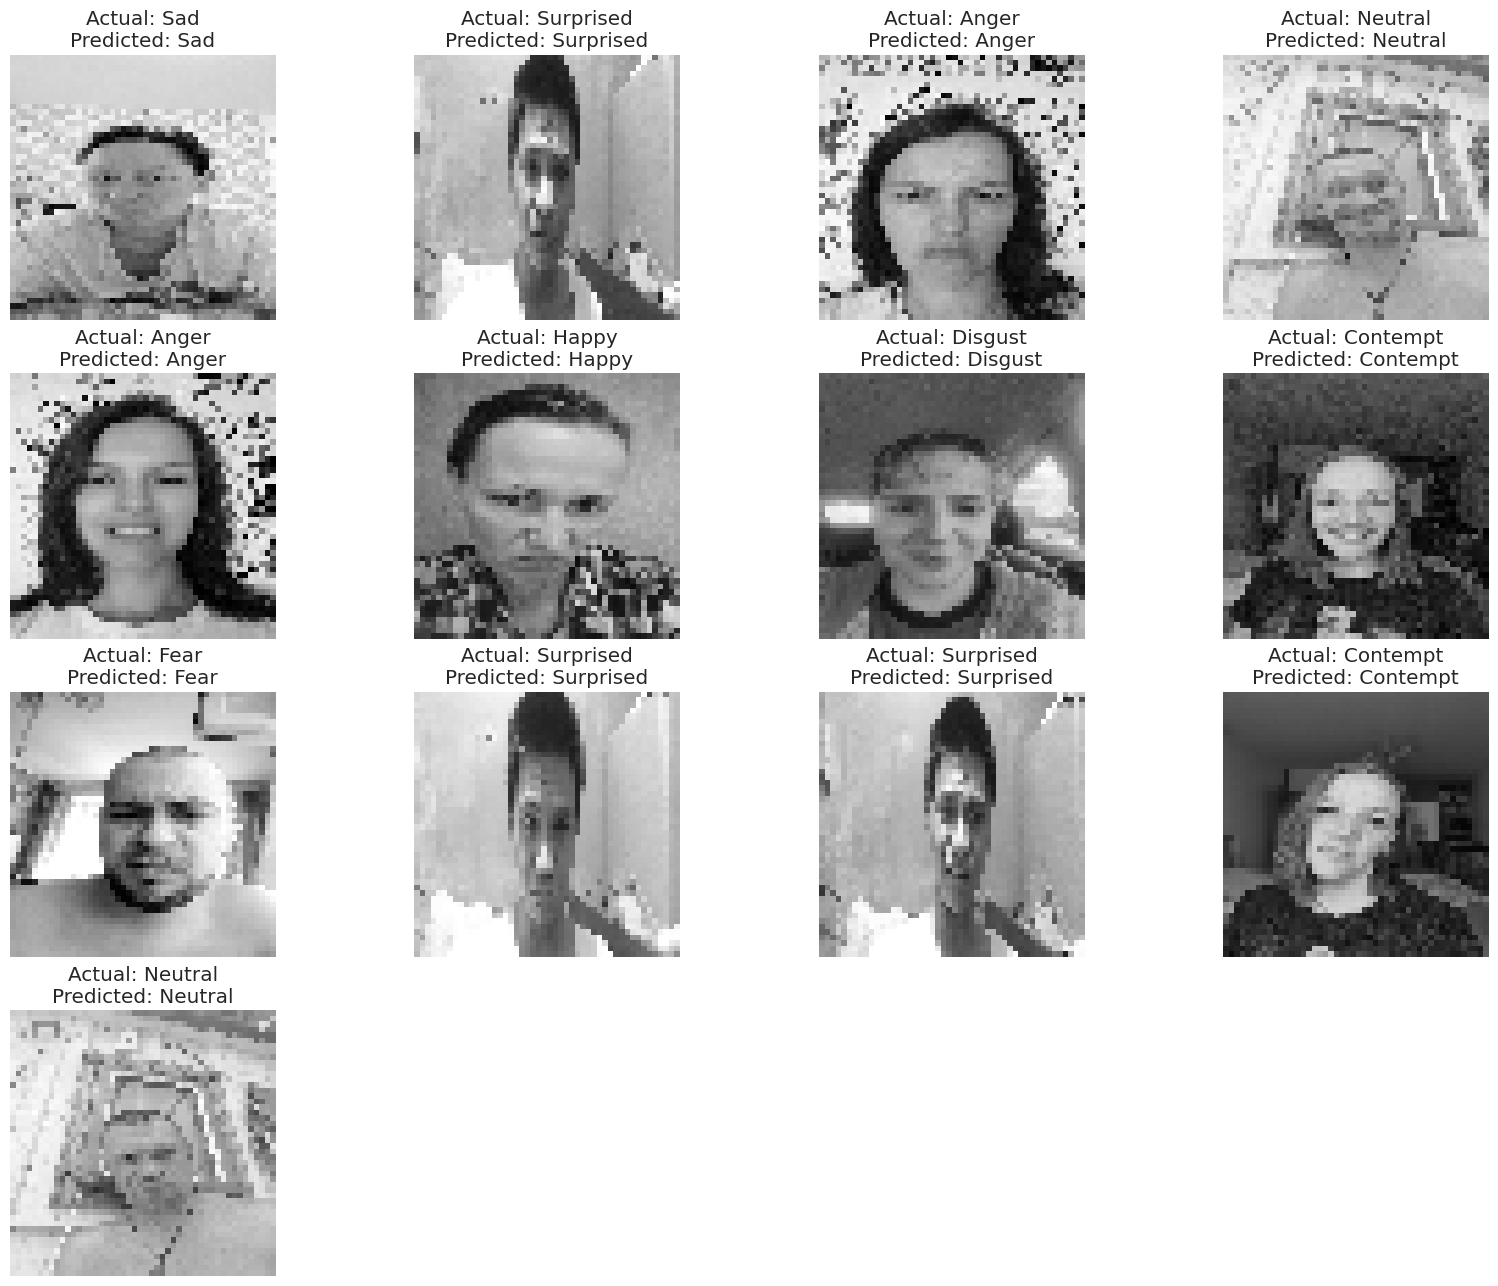

In [30]:
num_images = min(20, len(X_test))
plt.figure(figsize=(20, 20))
for i in range(num_images):
    plt.subplot(5, 4, i + 1)

    img = X_test[i].copy()
    img = img * 255
    img = img.astype(np.uint8)

    if img.shape[-1] == 1:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.title(f"Actual: {EMOTIONS[y_true[i]]}\nPredicted: {EMOTIONS[y_pred_classes[i]]}")
    plt.axis('off')
plt.show()


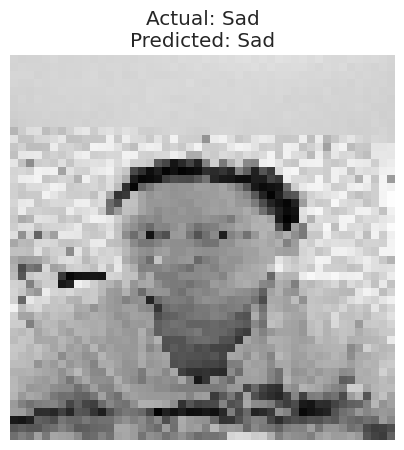

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Select an index (e.g., 0) for the image you want to visualize
index = 0

# Get the image from X_test and preprocess it for display
img = X_test[index].copy()
img = img * 255  # Convert back to original scale
img = img.astype(np.uint8)

# Convert grayscale to RGB (if needed)
if img.shape[-1] == 1:
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show the image
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title(f"Actual: {EMOTIONS[y_true[index]]}\nPredicted: {EMOTIONS[y_pred_classes[index]]}")
plt.axis('off')
plt.show()
